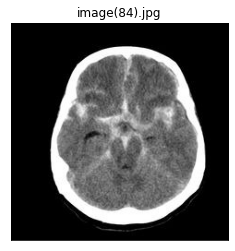

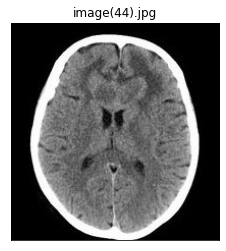

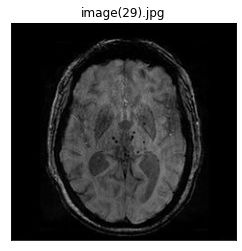

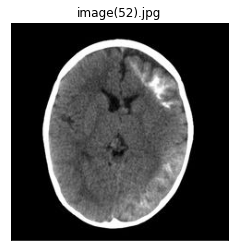

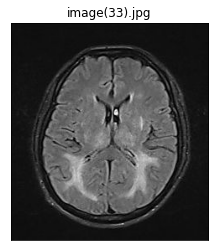

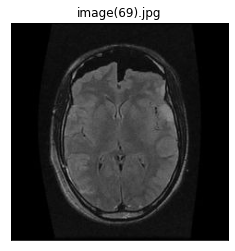

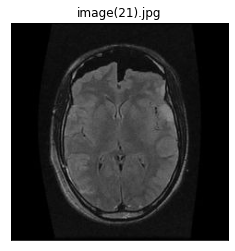

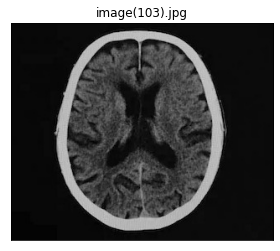

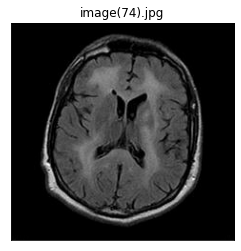

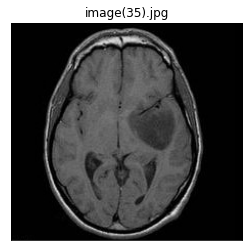

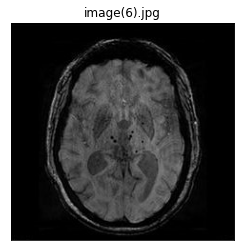

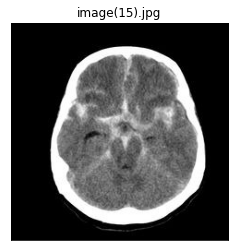

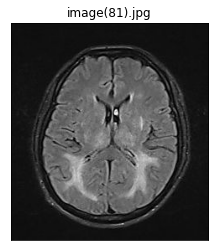

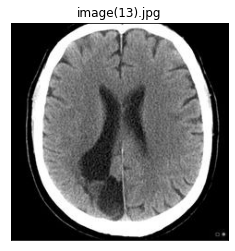

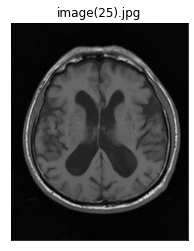

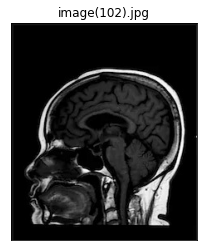

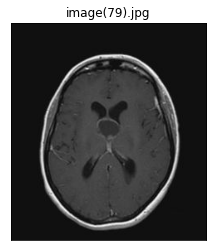

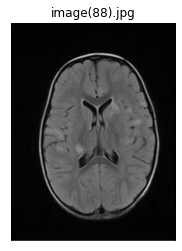

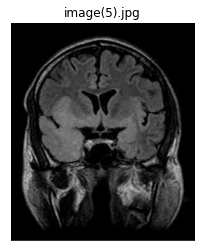

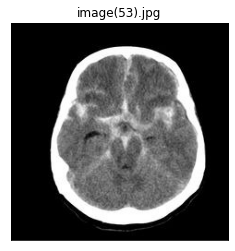

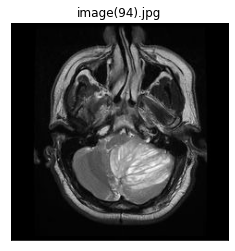

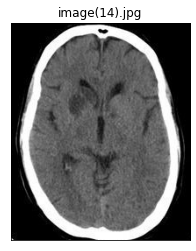

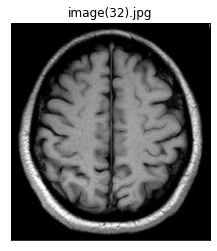

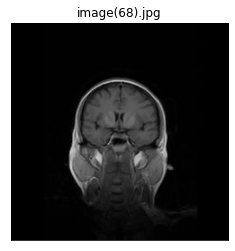

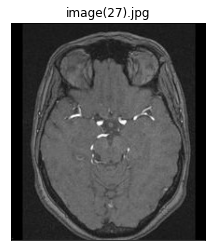

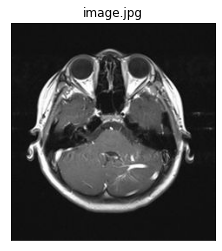

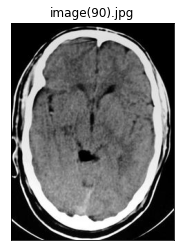

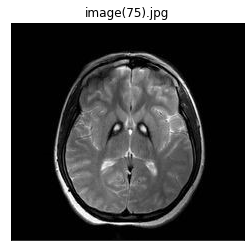

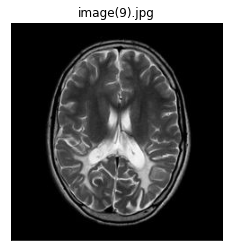

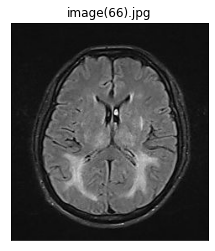

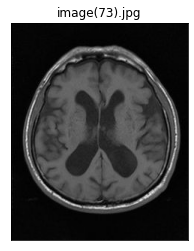

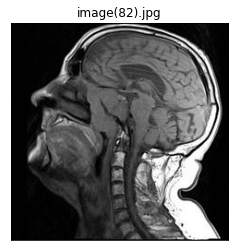

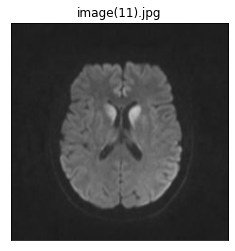

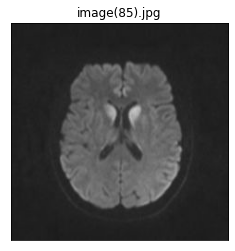

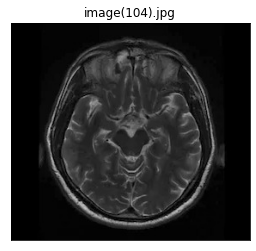

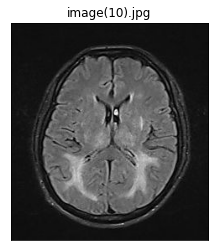

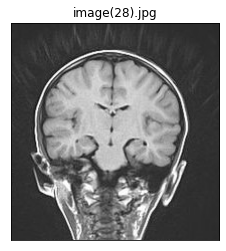

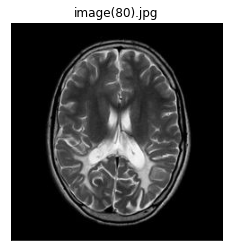

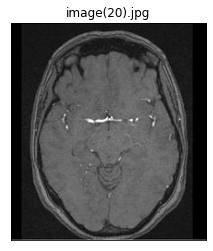

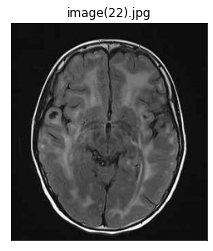

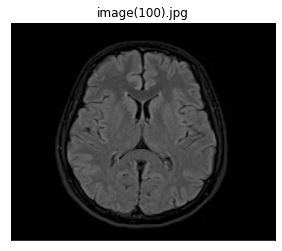

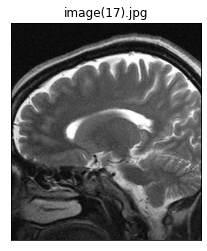

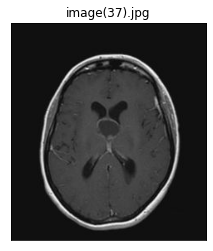

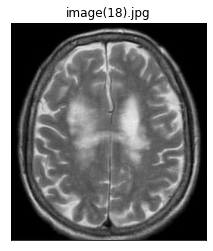

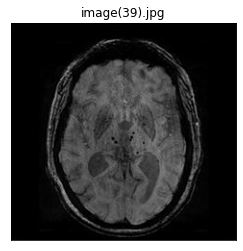

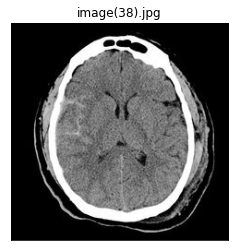

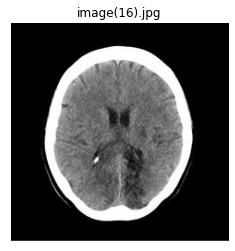

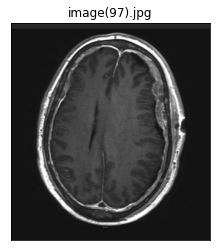

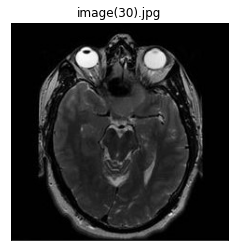

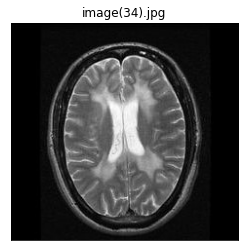

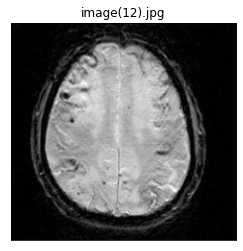

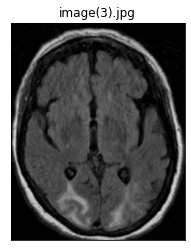

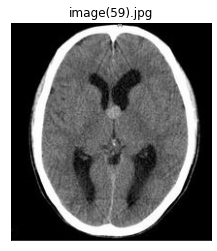

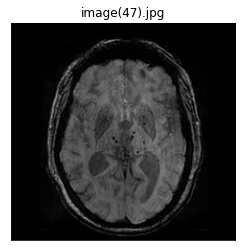

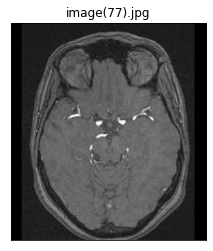

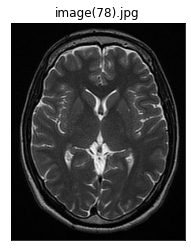

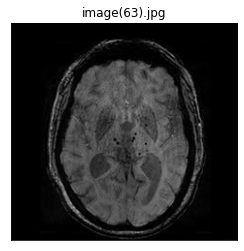

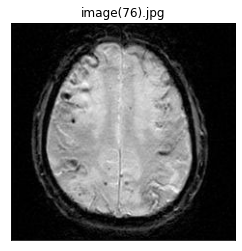

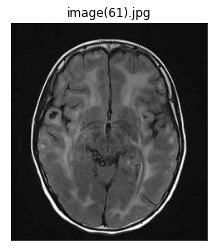

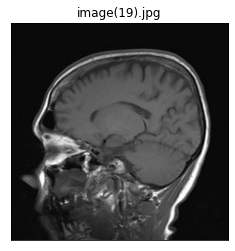

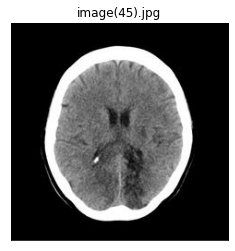

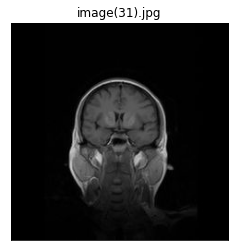

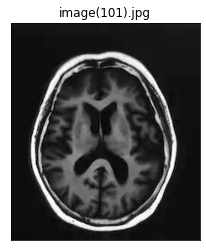

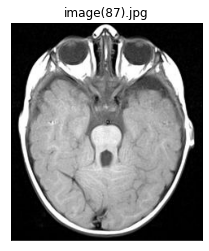

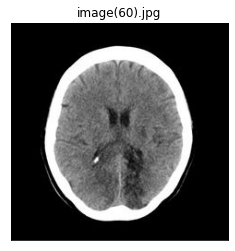

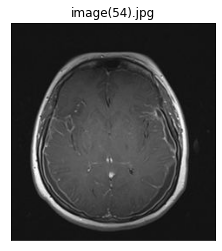

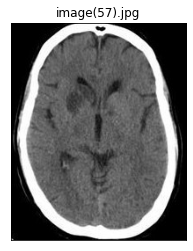

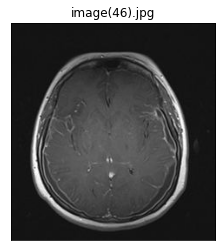

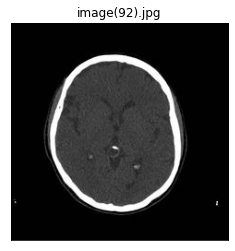

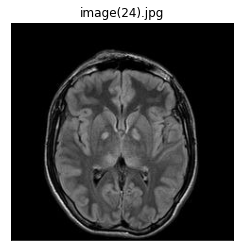

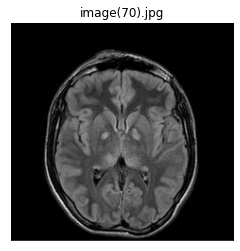

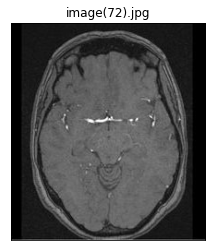

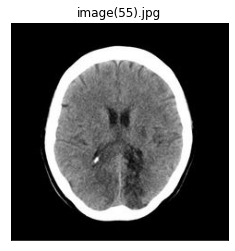

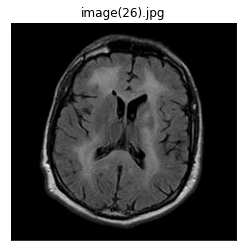

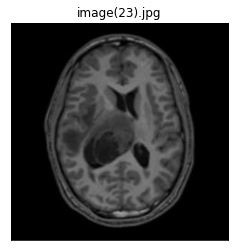

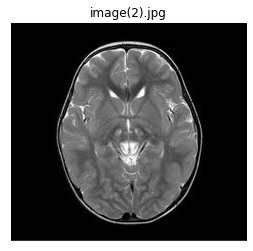

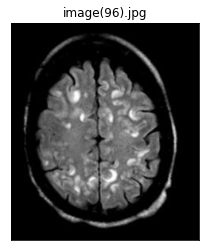

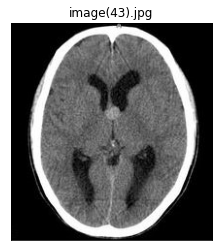

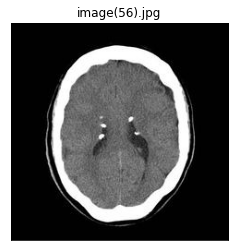

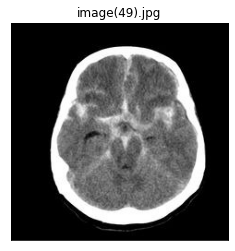

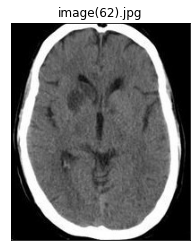

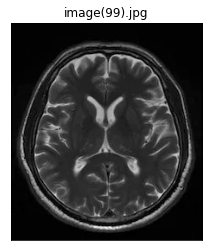

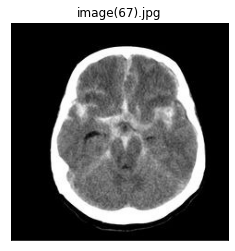

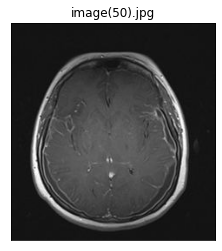

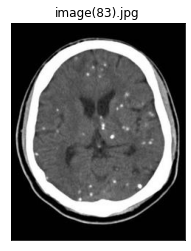

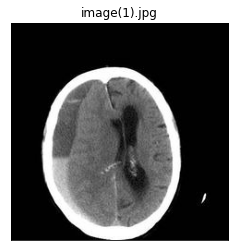

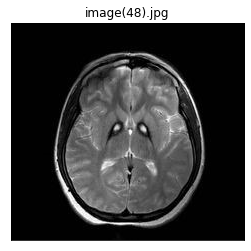

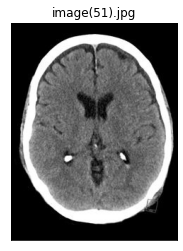

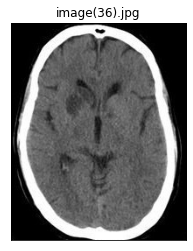

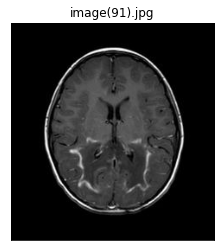

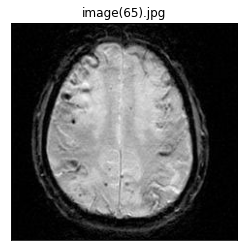

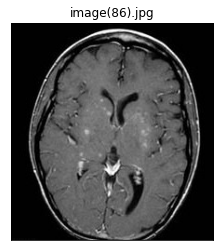

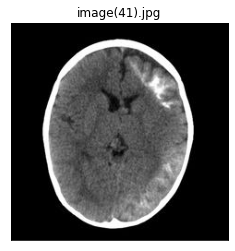

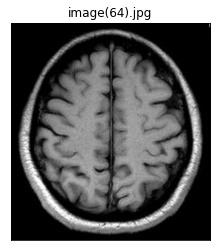

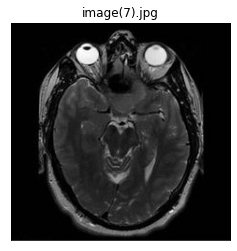

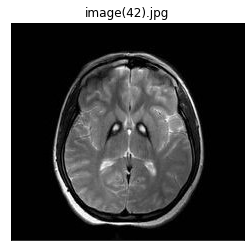

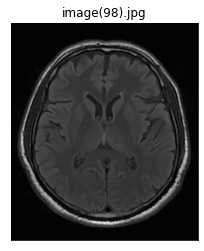

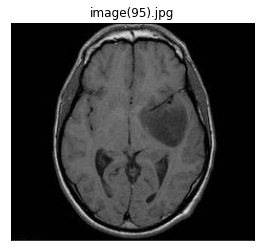

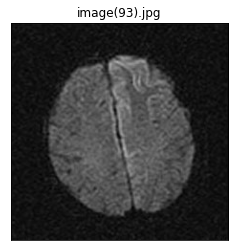

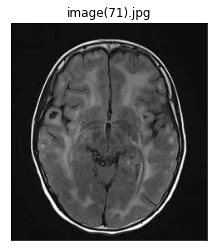

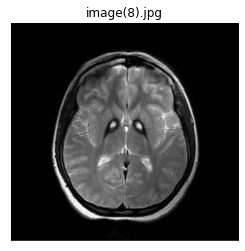

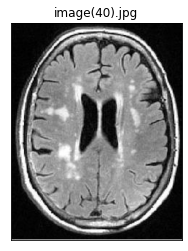

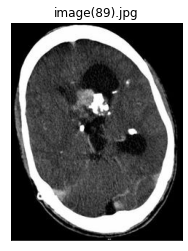

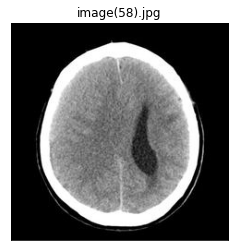

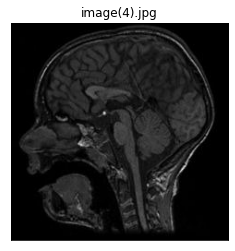

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import cv2

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import os
from os import listdir
from os.path import isfile, join
from pathlib import Path
import cv2

#Visualizing test set
Test_path = '/kaggle/input/brain-tumor-classification-mri/Testing/no_tumor'

for dirname, _, filenames in os.walk(Test_path):
    for filename in filenames:
        #print(os.path.join(dirname, filename))
        file_path = dirname + "//" + filename
        img = plt.imread(file_path)   #lecture
        plt.figure()
        plt.imshow(img)
        plt.xticks([])
        plt.yticks([])
        plt.title(filename)
        plt.show()



In [2]:
#evaluating the repartition of training set

Train_path = '/kaggle/input/brain-tumor-classification-mri/Training/'
all_classes = [x[0] for x in os.walk(Train_path)][1:]
#print(all_classes)

repartition = {}
for folder in all_classes:
    folder_name = folder.split('/')[-1]
    #print(folder_name)
    repartition[folder_name]=0
    all_files = [f for f in listdir(folder) if isfile(join(folder, f))]
    new_files = ["{}\\{}".format(folder, f) for f in all_files]
    for filename in new_files:
        #print(os.path.join(dirname, filename))
        repartition[folder_name] +=1
print(repartition)



{'no_tumor': 395, 'pituitary_tumor': 827, 'meningioma_tumor': 822, 'glioma_tumor': 826}


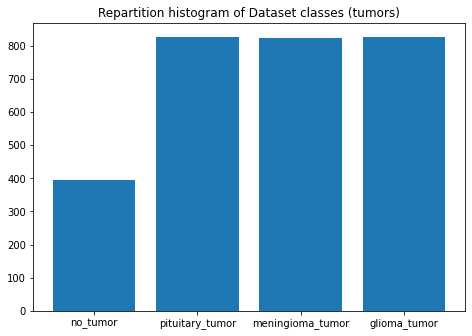

In [3]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(repartition.keys(),repartition.values() )
plt.title("Repartition histogram of Dataset classes (tumors)")
plt.show()

In [4]:
R_data = []
G_data = []
B_data = []
label = []
label_ind=0
for folder in all_classes:
    folder_name = folder.split('/')[-1]
    repartition[folder_name]=0
    all_files = [f for f in listdir(folder) if isfile(join(folder, f))]
    new_files = ["{}//{}".format(folder, f) for f in all_files]
    for filename in new_files:
        img = plt.imread(filename)   #lecture
        #print(img.shape)
        r = img[:,:,0].flatten(order = 'C')
        g = img[:,:,1].flatten(order = 'C')
        b = img[:,:,2].flatten(order = 'C')
        R_data.append(r)
        G_data.append(g)
        B_data.append(b)
        label.append(label_ind)
    label_ind +=1
    
#R_data = np.array(R_data)
#G_data = np.array(G_data)
#B_data = np.array(B_data)
label = np.array(label)

#print(R_data.shape)
#print(G_data.shape)
#print(B_data.shape)
print(label.shape)

all_chan = {'R':R_data, 'G':G_data, 'B': B_data}
new_features = {'R':[], 'G':[], 'B': []}

print(len(all_chan['R']))

(2870,)
2870


In [5]:
#Statistical feature extraction 

def moment(img, mean, order):
    mom = np.sum((img - mean)**order)/img.shape[0]
    return mom
    

for key in all_chan.keys():
    chan = all_chan[key]
    for i in range(len(chan)):
        mean = np.mean(chan[i])
        std = np.std(chan[i])
        #new_std = np.sqrt(moment(chan, mean, 2))
        skewness = moment(chan[i], mean, 3)
        kurtosis = moment(chan[i], mean,  4)
        feat_i = np.array([mean, std, skewness, kurtosis])
        new_features[key].append(feat_i)
    new_features[key]= np.array(new_features[key])
    
print(new_features['R'].shape)
print(new_features['R'])

(2870, 4)
[[5.58633475e+01 4.15991966e+01 4.11512052e+04 1.03502443e+07]
 [3.36462583e+01 3.57826935e+01 3.42059743e+04 3.37504727e+06]
 [7.64838384e+01 8.65091848e+01 5.12951274e+05 1.30384945e+08]
 ...
 [3.04246063e+01 4.12555662e+01 1.06458488e+05 1.48843334e+07]
 [2.32156219e+01 4.16701172e+01 1.51293279e+05 2.08356225e+07]
 [3.54218941e+01 3.90600628e+01 9.51995380e+04 1.53603759e+07]]
